In [149]:
# Данная лабораторная работа будет служить мне пособием. Поэтому я постораюсь довольно подробно описывать все, что встретиться дальше!

In [34]:
# Импорт необходимых библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. EDA

Первым делом желательно (необходимо) провести разведочный анализ данных (EDA).

Цели:
 - Понимание структуры и характеристик набора данных
 - Выявление аномалий и выбросов
 - Идентификация связей и корреляций между переменными
 - Подготовка данных для дальнейших этапов анализа

(ист. https://habr.com/ru/companies/otus/articles/752434/)

In [35]:
# Чтение данных и вывод основной инофрмации
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [37]:
print(df.isna().sum())
print(df.isna().sum().sum())

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience          

In [38]:
print(df.head())

  ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1      1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2      2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3      1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4      1995-05-07  55.0      300000.0        850.0     30437.0          48.0   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0      Divorced                 1.0                Rent               1095.0   
1       Widowed                 1.0            Mortgage                211.0   
2       Married                 0.0            Mortgage                546.0   
3       Married                 0.0               Other                153.0   
4        Single                 2.0                Rent                562.0   

   ...  EmploymentStatus  EducationLev

Из предыдущего блока анализа известно, что:
 1. 11017 строк и 36 столбцов
 2. Встречено 23589 пустых ячеек
 3. Типы (кол-во столбцов):
    - Float: 30
    - Object: 6
 4. Категориальные признаки:
    - MaritalStatus
    - HomeOwnershipStatus
    - EmploymentStatus
    - EducationLevel
    - LoanPurpose

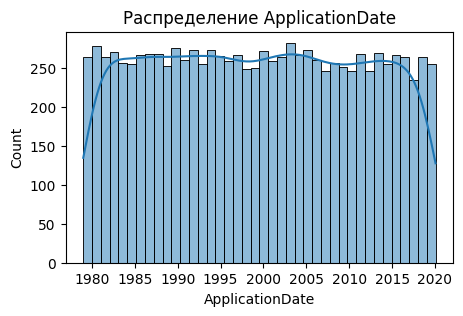

np.float64(-0.00403031641219801)

In [39]:
# Изучим распределение столбца дат

df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

plt.figure(figsize=(5,3))
sns.histplot(df['ApplicationDate'], kde=True, bins=40)
plt.title('Распределение ApplicationDate')
plt.show()

df['ApplicationDate'].corr(df['RiskScore'])

Можно сделать вывод, что 
 - линейная корреляция не прослеживается
 - кол-во выданных кредитов держится приблизтельно на одном уровне

По этим двум параметрам можно предположить, что дата не является важным параметром при прогнозе. 

P.S. Я понимаю, что это по факту грубое изречение, поскольку на кол-во возможно косвенно влияет ситуация в мире (нужна доп. информация) и сезонность. Я это сделал только для облегчения данных. По-хорошему можно оставить год и месяц. Год - для инф. в мире, месяц для сезонности.

In [40]:
df = df.drop('ApplicationDate', axis=1)
test = test.drop('ApplicationDate', axis=1)

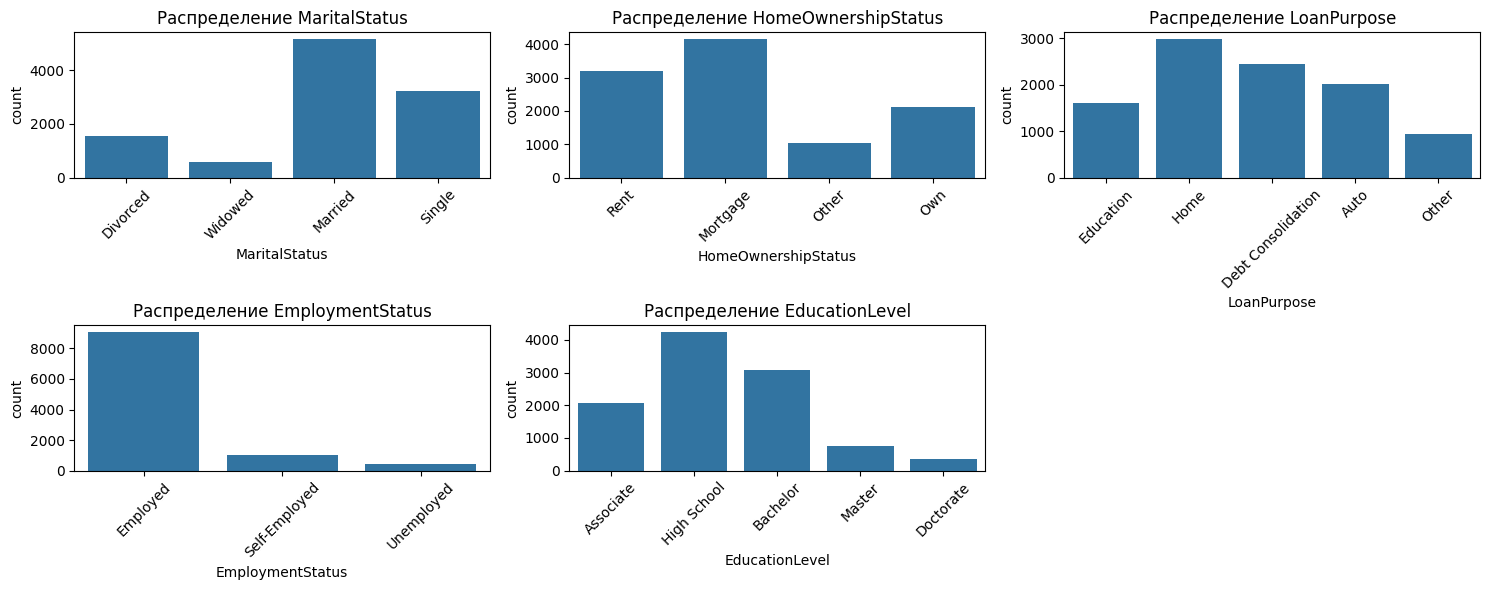

In [41]:
# Используя гистограммы, изучим категориальные признаки

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

num_cols = 3
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    # Можно удалить при условии, что был выполнен предыдуший блок
    if col == 'ApplicationDate': 
        continue

    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [42]:
# Преобразуем кат. признаки в булевы столбцы

for col in categorical_columns:
    df = pd.get_dummies(df, columns=[col], prefix=col)
    test = pd.get_dummies(test, columns=[col], prefix=col)

## Целевая перменная

Межквартильный размах (IQR) — это статистическая мера, которая количественно определяет разброс средних 50% набора данных. Он рассчитывается путем вычитания первого квартиля (Q1) из третьего квартиля (Q3).

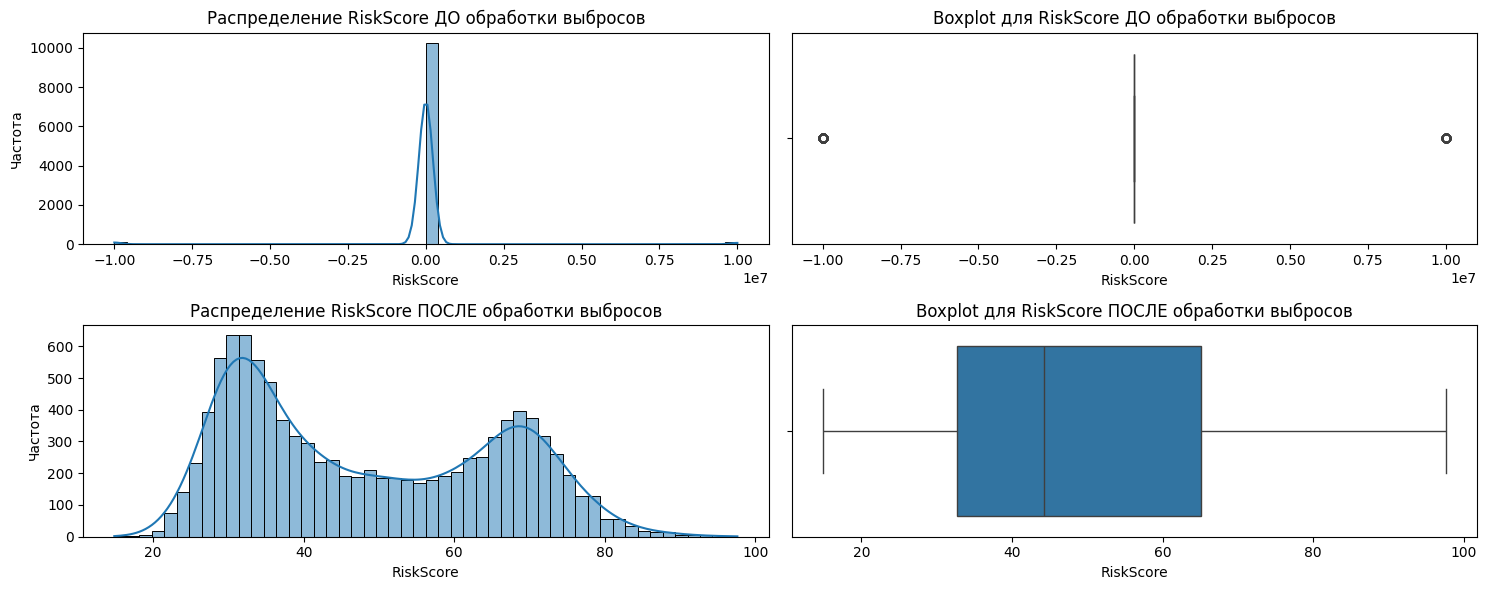

Кол-во выбросов: 215


In [43]:
# Теперь посмотрим на target_column

target = "RiskScore"

# Используем метод IQR
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)

IQR = Q3 - Q1

l_bound = -1.5 * IQR + Q1
u_bound = 1.5 * IQR + Q3

df_without_outliers = df[(df[target] >= l_bound) & (df[target] <= u_bound)].copy()

fig, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.histplot(df[target], bins=50, kde=True, ax=axes[0,0])
axes[0,0].set_title('Распределение RiskScore ДО обработки выбросов')
axes[0,0].set_xlabel('RiskScore')
axes[0,0].set_ylabel('Частота')

sns.boxplot(x=df[target], ax=axes[0,1])
axes[0,1].set_title('Boxplot для RiskScore ДО обработки выбросов')

sns.histplot(df_without_outliers[target], bins=50, kde=True, ax=axes[1,0])
axes[1,0].set_title('Распределение RiskScore ПОСЛЕ обработки выбросов')
axes[1,0].set_xlabel('RiskScore')
axes[1,0].set_ylabel('Частота')

sns.boxplot(x=df_without_outliers[target], ax=axes[1,1])
axes[1,1].set_title('Boxplot для RiskScore ПОСЛЕ обработки выбросов')

plt.tight_layout()
plt.show()

# Кол-во выбросов
outliers_count = df[(df[target] < l_bound) | (df[target] > u_bound)]
print(f'Кол-во выбросов: {len(outliers_count)}')

In [44]:
# Общая статистика

print('С выбросами')
print(df['RiskScore'].describe())

print('\nБез выбросов')
print(df_without_outliers['RiskScore'].describe())

С выбросами
count    1.048700e+04
mean    -2.569878e+04
std      1.431675e+06
min     -9.999999e+06
25%      3.256475e+01
50%      4.411876e+01
75%      6.535690e+01
max      1.000000e+07
Name: RiskScore, dtype: float64

Без выбросов
count    10272.000000
mean        48.358094
std         17.241456
min         14.841417
25%         32.722756
50%         44.195792
75%         65.124190
max         97.597249
Name: RiskScore, dtype: float64


## Корреляция

<Axes: >

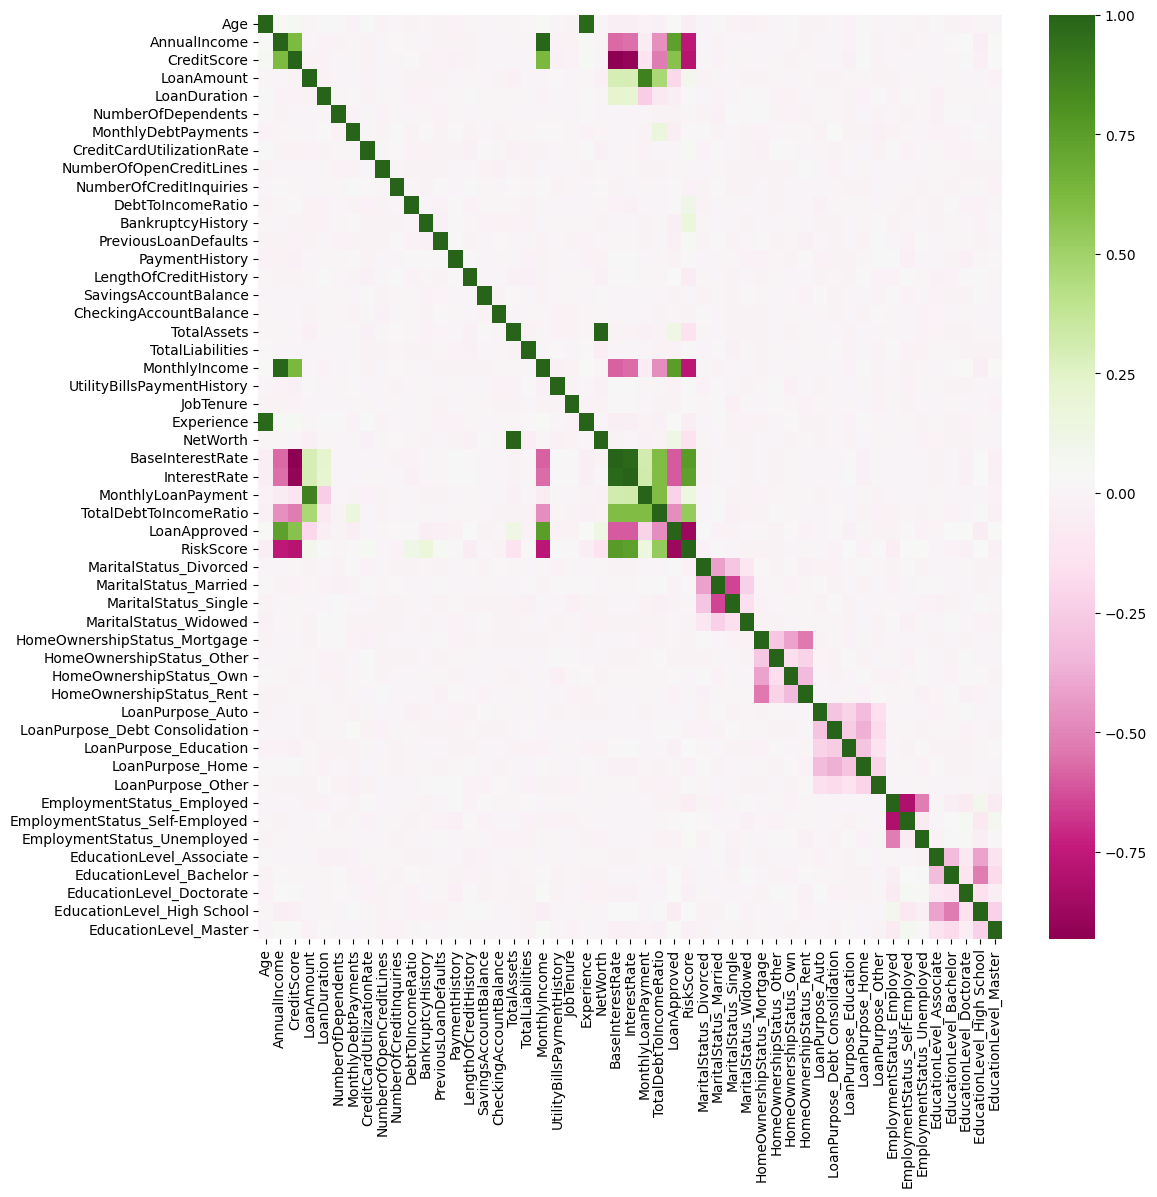

In [45]:
# Матрица корреляци

df_ = df_without_outliers.dropna().copy()
test_ = test.dropna().copy()

plt.figure(figsize=(12,12))

sns.heatmap(df_.corr(), cmap='PiYG')

Можно хорошо заметить из heatmap выше, что имеются корреляции со столбцом RiskScore

In [46]:
# Найдем первые 15 коррелирующих значений по убыванию

risk_score_top = df_.corr()[['RiskScore']]

print(risk_score_top['RiskScore'].abs().sort_values(ascending=False).head(16))

RiskScore                    1.000000
LoanApproved                 0.872722
CreditScore                  0.785425
MonthlyIncome                0.770608
BaseInterestRate             0.758712
AnnualIncome                 0.758480
InterestRate                 0.742940
TotalDebtToIncomeRatio       0.532384
BankruptcyHistory            0.177559
MonthlyLoanPayment           0.151459
TotalAssets                  0.145735
NetWorth                     0.144574
DebtToIncomeRatio            0.110761
LoanAmount                   0.084978
LengthOfCreditHistory        0.056978
CreditCardUtilizationRate    0.055320
Name: RiskScore, dtype: float64


Можно заметить, что первые 7 (от LoanApproved до TotalDebtToIncomeRatio) наиболее коррелируют. Рассмотрим их более детально: 

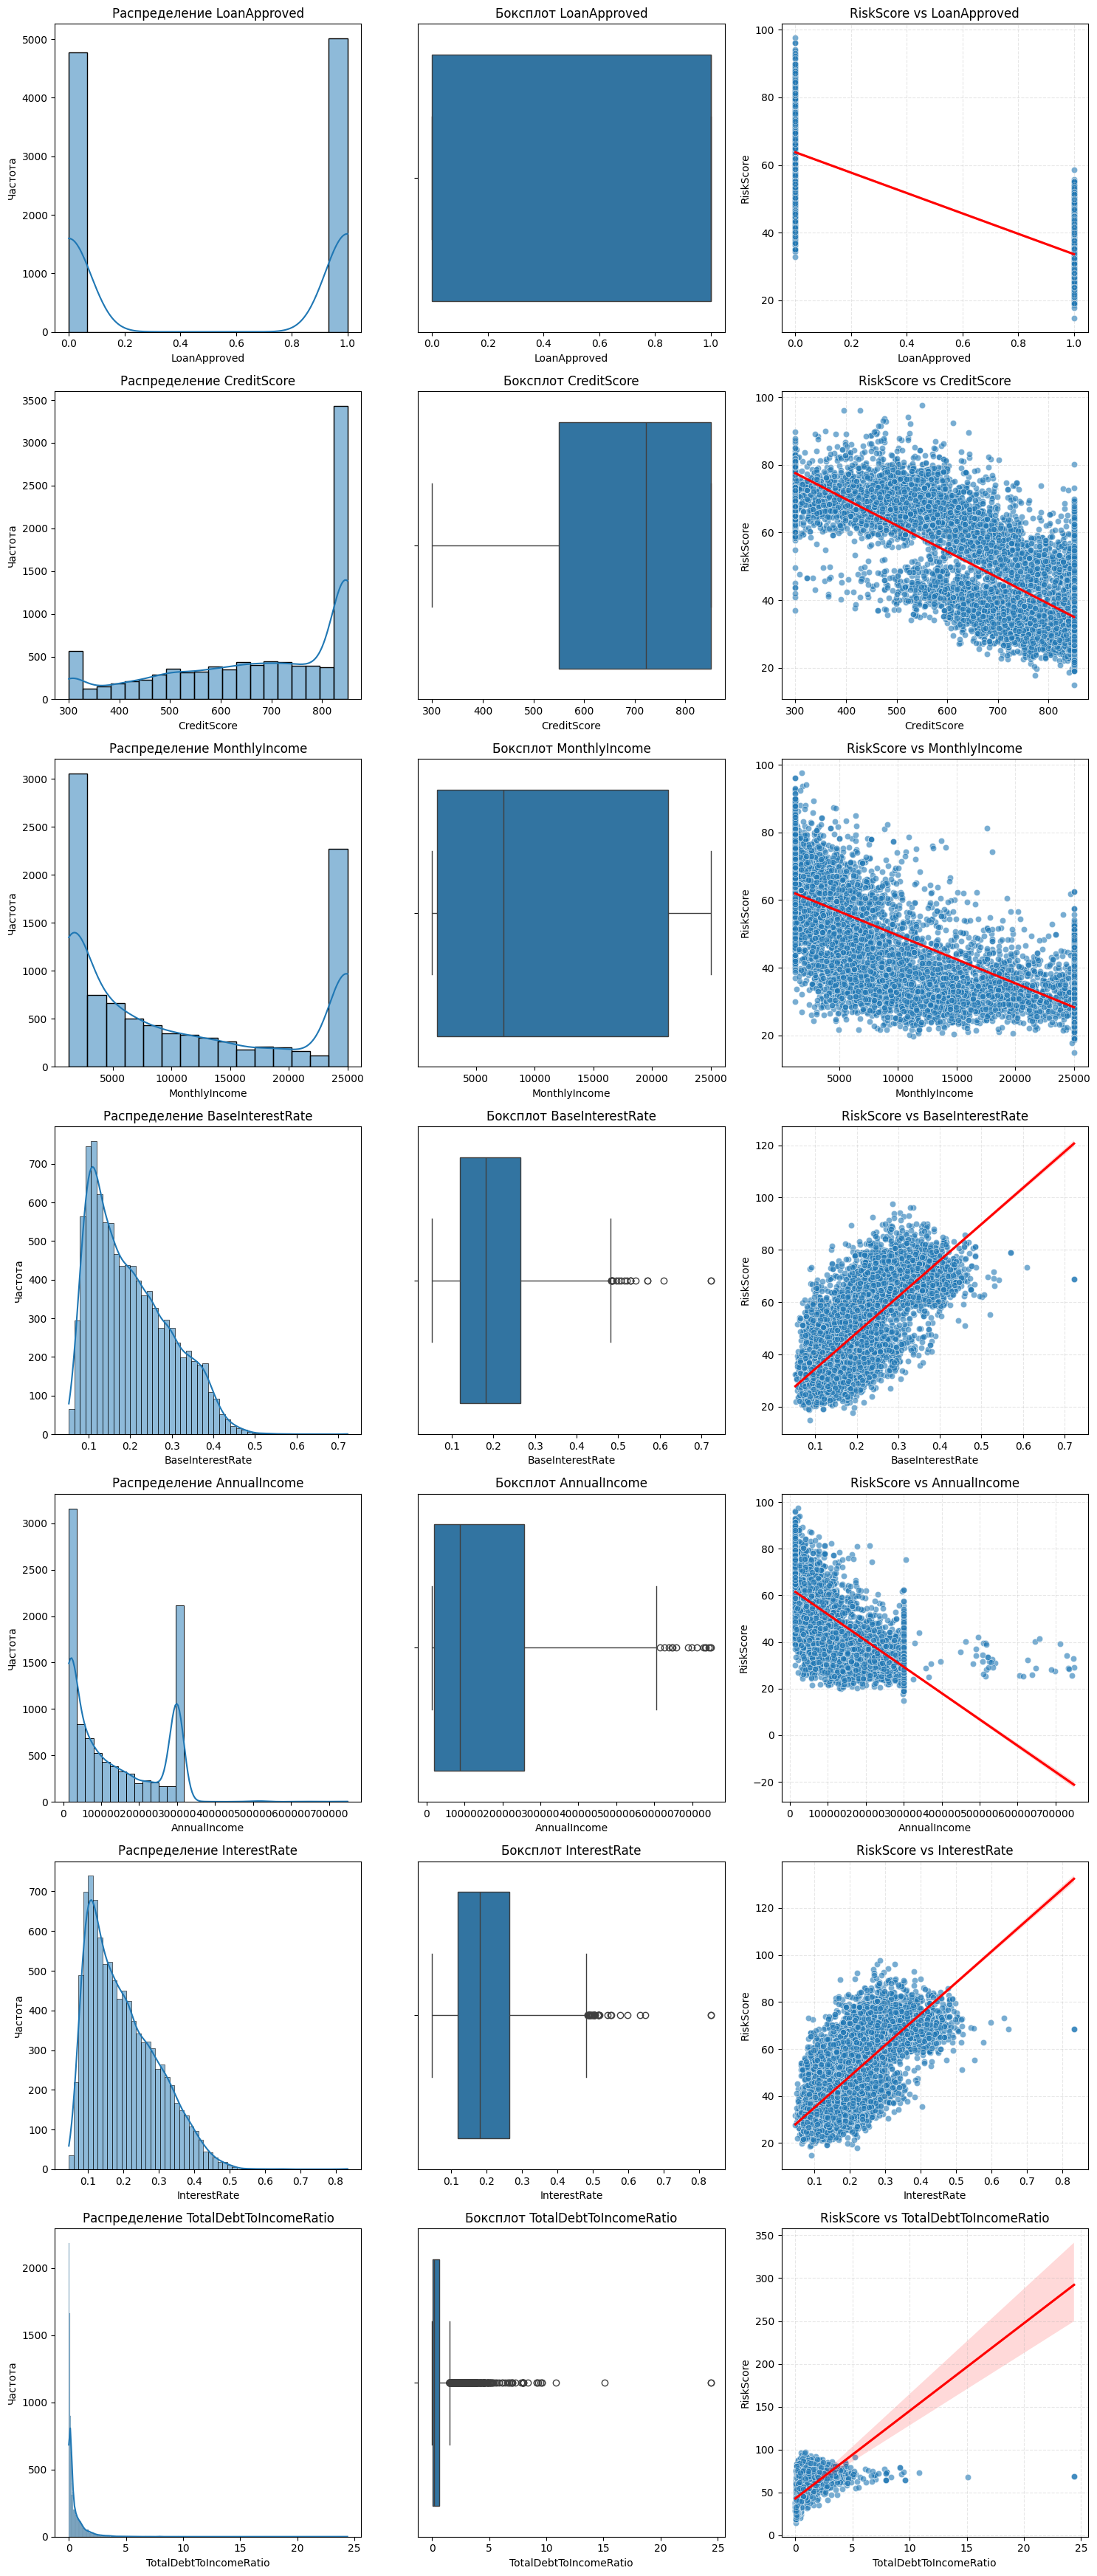

In [47]:
most_corr_cols = ['LoanApproved', 'CreditScore', 'MonthlyIncome', 'BaseInterestRate', 'AnnualIncome', 'InterestRate', 'TotalDebtToIncomeRatio']
target = 'RiskScore'

fig, axis = plt.subplots(7, 3, figsize=(15, 35))

axis = axis.flatten()

for i, feature in enumerate(most_corr_cols):
    sns.histplot(df_[feature], kde=True, ax=axis[i*3])
    axis[i*3].set_title(f'Распределение {feature}')
    axis[i*3].set_xlabel(feature)
    axis[i*3].set_ylabel('Частота')

    sns.boxplot(x=df_[feature], ax=axis[i*3+1])
    axis[i*3+1].set_title(f'Боксплот {feature}')
    axis[i*3+1].set_xlabel(feature)

    sns.scatterplot(x=df_[feature], y=df_[target], ax=axis[i*3+2], alpha=0.6)
    sns.regplot(x=feature, y=target, data=df_, scatter=False, ax=axis[i*3+2], color='red')
    axis[i*3+2].set_title(f'{target} vs {feature}')
    axis[i*3+2].set_xlabel(feature)
    axis[i*3+2].set_ylabel(target)
    axis[i*3+2].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
# Проведем некоторые преобразования для посл. обработки

# для предотвращения Inf\Nan
epsilon = 1e-6
for col in ['AnnualIncome', 'LoanDuration', 'NumberOfOpenCreditLines']:
    df_[f'{col}_clean'] = df_[col].replace(0, epsilon)

# log преобразования для "скошенных" признаков
# Эти значения часто имеют много маленький и мало очень больших значений
for col in ['AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments']:
    df_[f'{col}_log'] = np.log1p(df_[col])

# возможно, зависимость риска от кредитного рейтинга или возраста не является прямой линией
df_['CredidScore_sq'] = df_['CreditScore'] ** 2
df_['CredidScore_cub'] = df_['CreditScore'] ** 3

df_['Age_sq'] = df_['Age'] ** 2

# метрики и отношения с "четким финансовым смыслом"
# индикатор заемщика обслуживать долг
df_['Debt_to_Income_Ratio'] = df_['MonthlyDebtPayments'] / df_['AnnualIncome_clean'] 
# индикатор величины запрашиваемого кредита относительно заработка
df_['Loan_to_Income_Ratio'] = df_['LoanAmount'] / df_['AnnualIncome_clean'] 
# индикатор, который может дать представление о процентной составляющей платежа
df_['Approx_Monthly_Principal'] = df_['LoanAmount'] / df_['LoanDuration_clean'] 
# индикатор, который может дать представление о "растянутости" возможности заемщика
df_['Utilization_per_Line'] = df_['CreditCardUtilizationRate'] / df_['NumberOfOpenCreditLines_clean'] 

# взаимодействия
# эффект от множества запросов усиливается при низком кред. рейтинге, или наоборот
df_['CreditScore_x_Inquiries'] = df_['CreditScore'] * df_['NumberOfCreditInquiries'] 

df_ = df_.drop(columns=['AnnualIncome_clean', 'LoanDuration_clean', 'NumberOfOpenCreditLines_clean'])

In [49]:
epsilon = 1e-6
for col in ['AnnualIncome', 'LoanDuration', 'NumberOfOpenCreditLines']:
    test_[f'{col}_clean'] = test_[col].replace(0, epsilon)

for col in ['AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments']:
    test_[f'{col}_log'] = np.log1p(test_[col])

test_['CredidScore_sq'] = test_['CreditScore'] ** 2
test_['CredidScore_cub'] = test_['CreditScore'] ** 3

test_['Age_sq'] = test_['Age'] ** 2

test_['Debt_to_Income_Ratio'] = test_['MonthlyDebtPayments'] / test_['AnnualIncome_clean']
test_['Loan_to_Income_Ratio'] = test_['LoanAmount'] / test_['AnnualIncome_clean']
test_['Approx_Monthly_Principal'] = test_['LoanAmount'] / test_['LoanDuration_clean']
test_['Utilization_per_Line'] = test_['CreditCardUtilizationRate'] / test_['NumberOfOpenCreditLines_clean'] 

test_['CreditScore_x_Inquiries'] = test_['CreditScore'] * test_['NumberOfCreditInquiries']

test_ = test_.drop(columns=['AnnualIncome_clean', 'LoanDuration_clean', 'NumberOfOpenCreditLines_clean'])

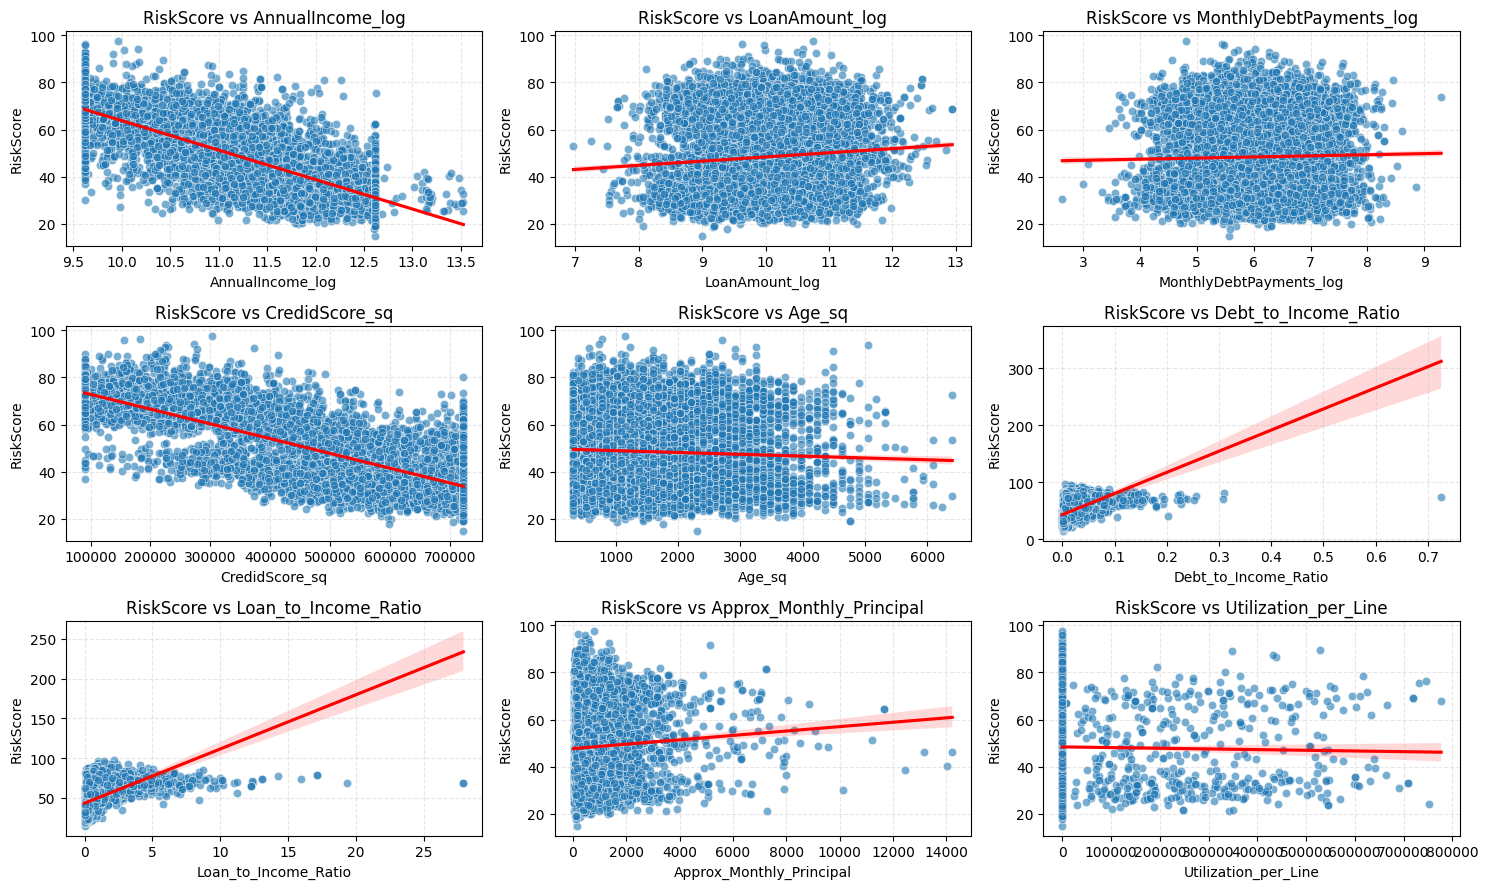

In [50]:
new_columns = ['AnnualIncome_log', 'LoanAmount_log', 'MonthlyDebtPayments_log', 'CredidScore_sq', 'Age_sq', 'Debt_to_Income_Ratio', 'Loan_to_Income_Ratio', 'Approx_Monthly_Principal', 'Utilization_per_Line']

num_cols = 3
num_rows = (len(new_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(new_columns):

    ax = axes[i]
    sns.scatterplot(x=df_[feature], y=df_[target], ax=ax, alpha=0.6)
    sns.regplot(x=feature, y=target, data=df_, scatter=False, ax=ax, color='red')
    ax.set_title(f'{target} vs {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    ax.grid(True, linestyle='--', alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 2. Оснвовная часть

## Нормализация

In [51]:
# bool столбцы уже подходят, поэтому их мы вынесем
target = df_['RiskScore']
number_features = df_[df_.select_dtypes(include=['number']).columns.drop('RiskScore')]
bools = df_[df_.select_dtypes(include=['bool']).columns]

# ------------------------------------------------------------------------

number_features_test = test_[test_.select_dtypes(include=['number']).columns]
bools_test = test_[test_.select_dtypes(include=['bool']).columns]

### MIN-MAX

In [52]:
# x = (x - x_min) / (x_max-x_min), где x - признак
number_features_minmax_normalized = number_features.apply(lambda feature: (feature - feature.min()) / (feature.max() - feature.min()))

print(number_features_minmax_normalized.agg(['max', 'min']))

df_minmax_normalized = number_features_minmax_normalized.join(bools).join(target)

# ------------------------------------------------------------------------

number_features_minmax_normalized_test = number_features_test.apply(lambda feature: (feature - feature.min()) / (feature.max() - feature.min()))
test_minmax_normalized = number_features_minmax_normalized_test.join(bools_test)

     Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
max  1.0           1.0          1.0         1.0           1.0   
min  0.0           0.0          0.0         0.0           0.0   

     NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
max                 1.0                  1.0                        1.0   
min                 0.0                  0.0                        0.0   

     NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  LoanAmount_log  \
max                      1.0                      1.0  ...             1.0   
min                      0.0                      0.0  ...             0.0   

     MonthlyDebtPayments_log  CredidScore_sq  CredidScore_cub  Age_sq  \
max                      1.0             1.0              1.0     1.0   
min                      0.0             0.0              0.0     0.0   

     Debt_to_Income_Ratio  Loan_to_Income_Ratio  Approx_Monthly_Principal  \
max                   1.0                   1.

### Z-SCORE

In [53]:
# z = (x - 'среднее значение') / 'стандартное отклонение'

number_features_zscore_normalized = number_features.apply(lambda feature: (feature - feature.mean()) / feature.std())

print(number_features_zscore_normalized.agg(['std', 'mean']))

df_zscore_normalized = number_features_zscore_normalized.join(bools).join(target)

# ------------------------------------------------------------------------
number_features_zscore_normalized_test = number_features_test.apply(lambda feature: (feature - feature.mean()) / feature.std())
test_zscore_normalized = number_features_zscore_normalized_test.join(bools_test)

               Age  AnnualIncome   CreditScore    LoanAmount  LoanDuration  \
std   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
mean  2.584584e-16  5.808053e-18 -3.092788e-16 -3.630033e-17  6.897063e-17   

      NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
std         1.000000e+00         1.000000e+00               1.000000e+00   
mean       -7.260067e-19        -3.267030e-17              -6.461459e-17   

      NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  LoanAmount_log  \
std              1.000000e+00             1.000000e+00  ...    1.000000e+00   
mean            -7.441568e-17             3.920436e-17  ...    1.015683e-15   

      MonthlyDebtPayments_log  CredidScore_sq  CredidScore_cub        Age_sq  \
std              1.000000e+00    1.000000e+00     1.000000e+00  1.000000e+00   
mean             6.083936e-16   -8.857281e-17     1.292292e-16 -6.824463e-17   

      Debt_to_Income_Ratio  Loan_to_Income_Ratio  Approx_

## Класс линейной регрессии

In [54]:
from typing import Optional

In [82]:
class LinearRegression:
    def __init__(self, method: str ='analytical', learning_rate: float = 1e-2, max_iter: int = 1000):
        self.method: str = method
        self.max_iter: int = max_iter
        self.learning_rate: float = learning_rate
        self.weights: Optional[np.ndarray] = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        method_map = {
            'analytical': self._fit_analytical,
            'gradient_descent': self._fit_gradient_descent,
            'stoch_gradient_descent': self._fit_stoch_gradient_descent
        }

        method = method_map.get(self.method)

        if method:
            method(X, y)
        else:
            raise ValueError(f'Неизвестный метод обучения: {self.method}')

    def _bias(self, X: np.ndarray):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def _fit_analytical(self, X: np.ndarray, y: np.ndarray):
        """
        Обучение модели с использованием аналитического решения (нормальное уравнение).
        Решает уравнение (X^T * X) * weights = X^T * y
        """

        _X = self._bias(X)

        try:
            self.weights = np.linalg.solve(_X.T @ _X, _X.T @ y)
        except np.linalg.LinAlgError:
            print("Не удалось найти аналитическое решение (возможно матрица X.T @ X сингулярна)")
            self.weights = None

    def _fit_gradient_descent(self, X: np.ndarray, y: np.ndarray, tolerance: float = 1e-6):
        """
        Обучение модели с использованием батчевого градиентоного спуска.
        """

        _X = self._bias(X)
        self.weights = np.zeros(_X.shape[1])

        for i in range(self.max_iter):
            x = _X @ self.weights

            # Формула градиента для MSE: (2/m) * _X.T @ (x - y)
            gradients = (2/X.shape[0]) * _X.T @ (x - y)
            self.weights -= self.learning_rate * gradients
        else:
            print(f'Обучение завершено: достигнуто макс. кол-во итераций ({self.max_iter})')

    def _fit_stoch_gradient_descent(self, X: np.ndarray, y: np.ndarray, tolerance: float = 1e-6, batch_size: int = 32):
        """
        Обучение модели с использованием стохастического\мини-батч градиентоного спуска.
        """

        _X = self._bias(X)
        self.weights = np.zeros(_X.shape[1])


        for e in range(self.max_iter):
            permutation = np.random.permutation(X.shape[0])
            X_permutated = _X[permutation]
            y_permutated = y[permutation]

            for i in range(0, X.shape[0], batch_size):
                X_batch = X_permutated[i:i+batch_size]
                y_batch = y_permutated[i:i+batch_size]

                if len(X_batch) == 0:
                    continue

                gradients = (2/len(X_batch)) * X_batch.T @ (X_batch @ self.weights - y_batch)
                self.weights -= self.learning_rate * gradients
        else:
            print(f'Обучение завершено: достигнуто макс. кол-во эпох ({self.max_iter})')


    def predict(self, X: np.ndarray) -> np.ndarray:
        if self.weights is None:
            raise Exception("Вызовите прежде метод fit, поскольку модель нужно обучить")

        _X = self._bias(X)

        return _X @ self.weights

## Валидация

### КРОСС-ВАЛИДАЦИЯ K-FOLD

In [56]:
def k_fold(X: np.ndarray, y: np.ndarray, model: LinearRegression, k=5):
    scores = []
    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    for i in range(k):
        _model = deepcopy(model)

        test_idx = indices[fold_size * i : (i+1) * fold_size]
        X_test, y_test = X[test_idx], y[test_idx]

        train_idx = np.concatenate([indices[:fold_size * i], indices[(i+1) * fold_size:]])
        X_train, y_test = X[train_idx], y[train_idx]

        _model.fit(X_train, y_train)
        
        scores.append(mse(y_test, _model.predict(X_test)))

    return np.mean(scores)

### ВАЛИДАЦИЯ LEAVE-ONE-OUT

In [57]:
def leave_one_out(X: np.ndarray, y: np.ndarray, model: LinearRegression):
    scores = []
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)

    for i in range(n_samples):
        _model = deepcopy(model)

        X_test = X[i:i+1]
        X_train, y_test = np.delete(X, i, axis=0), np.delete(y, i)

        _model.fit(X_train, y_train)

        predictions[i] = _model.predict(X_test)[0]
        scores.append(model)

    return mse(y, predictions)

## METRICS

### MSE

In [58]:
def mse(target, x):
    return np.mean((np.array(target) - np.array(x)) ** 2)

### R2

In [59]:
def r2(target, x):
    return 1 - (
        np.sum((target - x) ** 2) /
        np.sum((target - np.mean(target)) ** 2)
    )

### MAE

In [60]:
def mae(target, x):
    return np.mean(np.abs(target - x))

### MAPE

In [61]:
def mape(target, x):
    if np.any(target == 0):
        raise ValueError('target не может содержать нули')
    
    return np.mean(np.abs((target - x) / target))

### СРАВНЕНИЕ С SKLEARN

In [62]:
from sklearn.linear_model import LinearRegression as SKLEARN_LR
from sklearn.metrics import (mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score)

from typing import Optional

In [84]:
X = df_zscore_normalized.drop(columns=['RiskScore']).values.astype(np.float64)
y = df_zscore_normalized['RiskScore'].values.astype(np.float64)

model: Optional[LinearRegression | SKLEARN_LR] = None

print('ANAL')
model = LinearRegression()
model.fit(X, y)
x = model.predict(X)

print(f'MSE (self): {mse(y, x)}')
print(f'MSE (skln): {mean_squared_error(y, x)}')
print(f'MAE (self): {mae(y, x)}')
print(f'MAE (skln): {mean_absolute_error(y, x)}')
print(f'MAPE (self): {mape(y, x)}')
print(f'MAPE (skln): {mean_absolute_percentage_error(y, x)}')
print(f'R2 (self): {r2(y, x)}')
print(f'R2 (skln): {r2_score(y, x)}')

print('\nGD')
model = LinearRegression(method='gradient_descent')
model.fit(X, y)
x = model.predict(X)

print(f'MSE (self): {mse(y, x)}')
print(f'MSE (skln): {mean_squared_error(y, x)}')
print(f'MAE (self): {mae(y, x)}')
print(f'MAE (skln): {mean_absolute_error(y, x)}')
print(f'MAPE (self): {mape(y, x)}')
print(f'MAPE (skln): {mean_absolute_percentage_error(y, x)}')
print(f'R2 (self): {r2(y, x)}')
print(f'R2 (skln): {r2_score(y, x)}')

print('\nSGD')
model = LinearRegression(method='stoch_gradient_descent')
model.fit(X, y)
x = model.predict(X)

print(f'MSE (self): {mse(y, x)}')
print(f'MSE (skln): {mean_squared_error(y, x)}')
print(f'MAE (self): {mae(y, x)}')
print(f'MAE (skln): {mean_absolute_error(y, x)}')
print(f'MAPE (self): {mape(y, x)}')
print(f'MAPE (skln): {mean_absolute_percentage_error(y, x)}')
print(f'R2 (self): {r2(y, x)}')
print(f'R2 (skln): {r2_score(y, x)}')

print('\nSKLN')
model = SKLEARN_LR()
model.fit(X, y)
x = model.predict(X)

print(f'MSE (self): {mse(y, x)}')
print(f'MSE (skln): {mean_squared_error(y, x)}')
print(f'MAE (self): {mae(y, x)}')
print(f'MAE (skln): {mean_absolute_error(y, x)}')
print(f'MAPE (self): {mape(y, x)}')
print(f'MAPE (skln): {mean_absolute_percentage_error(y, x)}')
print(f'R2 (self): {r2(y, x)}')
print(f'R2 (skln): {r2_score(y, x)}')

ANAL
MSE (self): 14.141646753929669
MSE (skln): 14.141646753929669
MAE (self): 2.9354046565824095
MAE (skln): 2.9354046565824095
MAPE (self): 0.06732490100556004
MAPE (skln): 0.06732490100556004
R2 (self): 0.9525031704065146
R2 (skln): 0.9525031704065146

GD
Обучение завершено: достигнуто макс. кол-во итераций (1000)
MSE (self): 16.881384928461927
MSE (skln): 16.881384928461927
MAE (self): 3.224408132517742
MAE (skln): 3.224408132517742
MAPE (self): 0.07394740712004079
MAPE (skln): 0.07394740712004079
R2 (self): 0.9433013511650344
R2 (skln): 0.9433013511650344

SGD
Обучение завершено: достигнуто макс. кол-во эпох (1000)
MSE (self): 15.146037062230725
MSE (skln): 15.146037062230725
MAE (self): 3.0366959966728824
MAE (skln): 3.0366959966728824
MAPE (self): 0.07051589141583685
MAPE (skln): 0.07051589141583685
R2 (self): 0.9491297757694673
R2 (skln): 0.9491297757694673

SKLN
MSE (self): 14.141646753929672
MSE (skln): 14.141646753929672
MAE (self): 2.935404656582629
MAE (skln): 2.9354046565

Значения совпали, чего и следовало ожидать. MSE показал себя лучше остальных, чего и следовало ожидать)
Чтобы выполнилось быстрее желательно изменить макс. кол-во итераций (100.000 -> new), я уже поменял.

# Запись в файл

In [83]:
X = df_zscore_normalized.drop(columns=['RiskScore']).values.astype(np.float64)
y = df_zscore_normalized['RiskScore'].values.astype(np.float64)

test_zscore_normalized = test_zscore_normalized[test_zscore_normalized.columns.drop('ID')]
test_X = test_zscore_normalized.values.astype(np.float64)

model = LinearRegression()

# print(df_zscore_normalized.info())
# print(test_zscore_normalized.info())

model.fit(X, y)
predictions = model.predict(test_X)

predictions_df = pd.DataFrame({
    'ID': range(len(test_X)),
    'RiskScore': predictions
})

predictions_df.to_csv('predictions.csv', index=False)